# OCR Projeto 02: Escaneamento de imagem

# Importando as bibliotecas

In [1]:
!pip install imutils pdf2image

In [22]:
!pip install easyocr

     |████████████████████████████████| 2.9 MB 943 kB/s eta 0:00:01
     |████████████████████████████████| 6.9 MB 87.5 MB/s eta 0:00:01
     |████████████████████████████████| 13.9 MB 18.6 MB/s eta 0:00:01�████▌        | 10.2 MB 18.6 MB/s eta 0:00:01
     |████████████████████████████████| 2.5 MB 37.5 MB/s eta 0:00:01
     |████████████████████████████████| 682 kB 20.3 MB/s eta 0:00:01
     |████████████████████████████████| 755.5 MB 2.3 kB/s eta 0:00:011MB 16.9 MB/s eta 0:00:40 MB 16.9 MB/s eta 0:00:40█▉                          | 138.4 MB 27.3 MB/s eta 0:00:23MB 42.4 MB/s eta 0:00:13     |██████████▏                     | 240.0 MB 32.6 MB/s eta 0:00:16     |███████████▍                    | 269.6 MB 10.0 MB/s eta 0:00:49     |███████████▊                    | 277.1 MB 3.4 MB/s eta 0:02:19     |███████████▉                    | 279.1 MB 3.4 MB/s eta 0:02:19     |███████████▉                    | 279.5 MB 3.4 MB/s eta 0:02:19      | 281.4 MB 3.4 MB/s eta 0:02:18     |████████████     

In [29]:
!pip install pillow

In [2]:
import numpy as np
import cv2
import imutils
from matplotlib import pyplot as plt

In [3]:
def mostrar(img):
  fig = plt.gcf()
  fig.set_size_inches(20, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

In [34]:
from pdf2image import convert_from_path

pdf_path = '../images/aso_teste.pdf'

aso_img = convert_from_path(pdf_path, first_page=1, last_page=1)
aso_img[0].save('../images/aso_teste.png', 'PNG')

# Processamentos na imagem (para transformação)

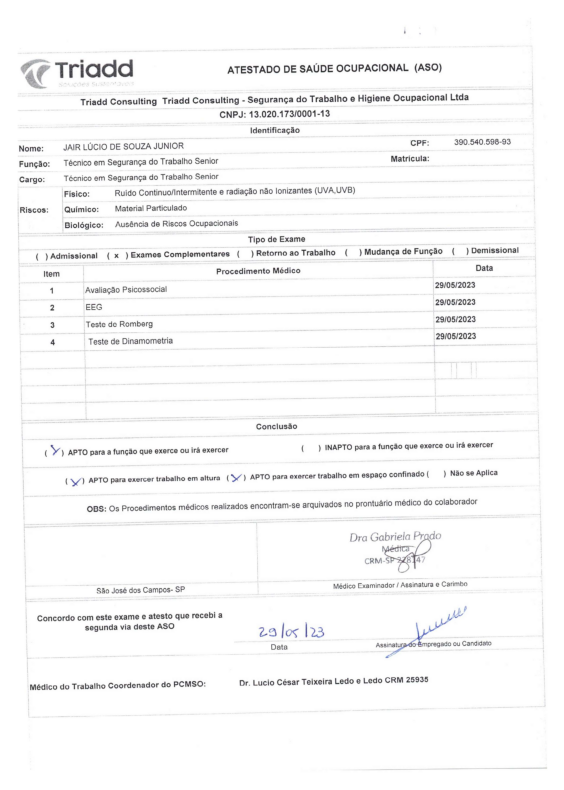

2339 1654


In [4]:
img = cv2.imread('../images/aso_teste.png')
original = img.copy()
mostrar(img)
(H, W) = img.shape[:2]
print(H, W)

## Conversão para tons de cinza (*grayscale*)

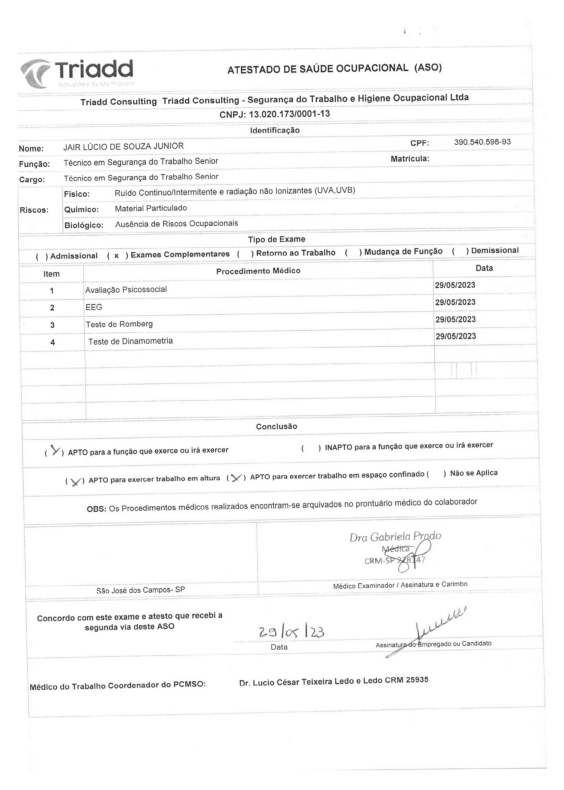

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mostrar(gray)

## Aplicação de desfoque (*Gaussian Blur*)

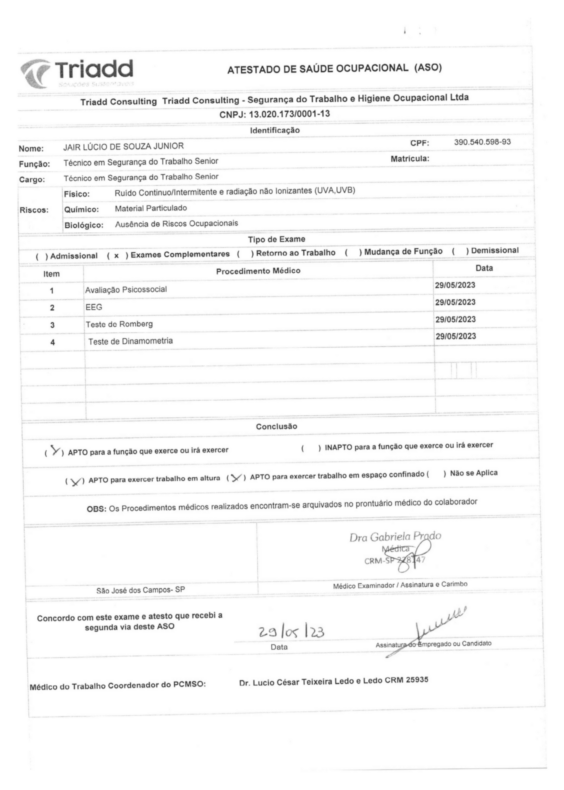

In [6]:
blur = cv2.GaussianBlur(gray, (5, 5), 0)
mostrar(blur)

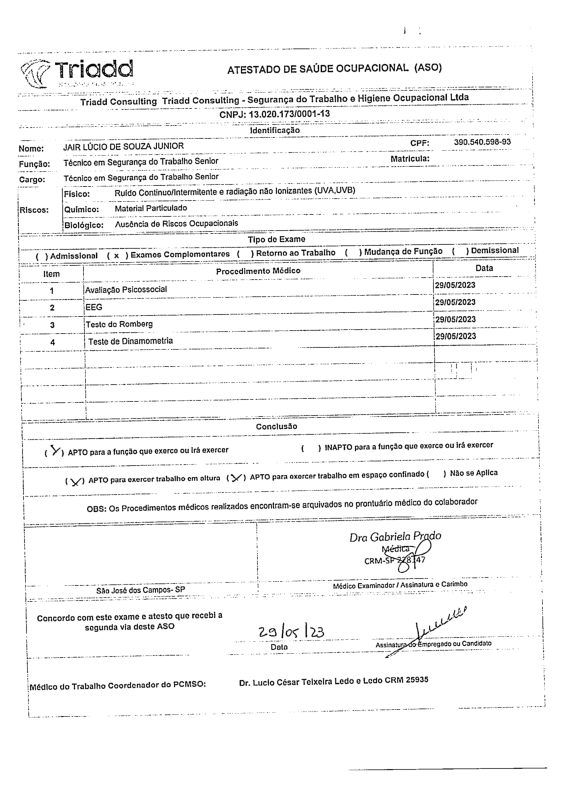

In [21]:
# img_process = cv2.cvtColor(transform, cv2.COLOR_BGR2GRAY)
img_process = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)
mostrar(img_process)

In [25]:
from easyocr import Reader
import cv2
from PIL import ImageFont, ImageDraw, Image
import numpy as np

In [26]:
lista_idiomas = 'en,pt'
idiomas = lista_idiomas.split(',')
print(idiomas)

['en', 'pt']


In [27]:
gpu = True #@param {type: 'boolean'}

In [35]:
# img = cv2.imread('../images/aso_teste.png')
# mostrar(img)

In [37]:
original = img.copy()

In [39]:
reader = Reader(idiomas, gpu)
resultados = reader.readtext(img_process)

In [41]:
resultados

[([[131, 138], [383, 138], [383, 218], [131, 218]],
  'Triadd',
  0.9610925866133667),
 ([[656, 156], [1317, 156], [1317, 201], [656, 201]],
  'ATESTADO DE SAÚDE OCUPACIONAL (ASO)',
  0.8662168743456481),
 ([[211, 259], [451, 259], [451, 299], [211, 299]],
  'Triadd Consulting',
  0.7684801405572262),
 ([[459, 255], [701, 255], [701, 295], [459, 295]],
  'Triadd Consulting',
  0.795919030888635),
 ([[716, 249], [1399, 249], [1399, 294], [716, 294]],
  'Segurança do Trabalho 0 Higiene_Ocupacional Ltda',
  0.6156848069074409),
 ([[633, 299], [977, 299], [977, 335], [633, 335]],
  'CNPJ: 13.020.173/0001-13',
  0.9783726802413956),
 ([[723, 349], [885, 349], [885, 385], [723, 385]],
  'Identificação',
  0.9941647117298263),
 ([[1212, 392], [1268, 392], [1268, 416], [1212, 416]],
  'CPFS',
  0.6716822385787964),
 ([[1344, 386], [1524, 386], [1524, 414], [1344, 414]],
  '390.540.598-93',
  0.6360543467401263),
 ([[26, 408], [106, 408], [106, 434], [26, 434]], 'Nome:', 0.9995073293424742),
 (

In [43]:
fonte = '../fontes/calibri.ttf'

In [44]:
def escreve_texto(texto, x, y, img, fonte, cor=(50,50,255), tamanho = 22):
  fonte = ImageFont.truetype(fonte, tamanho)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y - tamanho), texto, font = fonte, fill = cor)
  img = np.array(img_pil)
  return img

In [45]:
def coordenada_caixa(caixa):
  (te, td, bd, be) = caixa
  te = (int(te[0]), int(te[1]))
  td = (int(td[0]), int(td[1]))
  bd = (int(bd[0]), int(bd[1]))
  be = (int(be[0]), int(be[1]))
  return te, td, bd, be

In [46]:
def desenha_caixa(img, te, bd, cor_caixa=(200,255,0), espessura=2):
  cv2.rectangle(img, te, bd, cor_caixa, espessura)
  return img

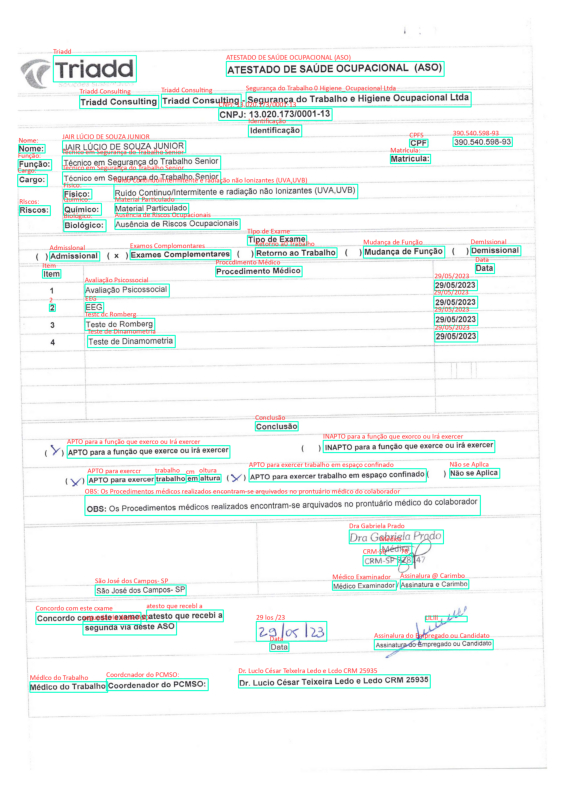

In [50]:
img = original.copy()
for (caixa, texto, probabilidade) in resultados:
  #print(caixa, texto, probabilidade)
  te, td, bd, be = coordenada_caixa(caixa)
  img = desenha_caixa(img, te, bd)
  img = escreve_texto(texto, te[0], te[1], img, fonte)
mostrar(img)

In [53]:
cv2.imwrite('../images/aso_processado.png', img)

True